### Predicting Price with Size

In [55]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted


warnings.simplefilter(action="ignore", category=FutureWarning)


### Prepare Data

#### Import

In [58]:
# A function wrangle that takes a file path as an argument and returns a DataFrame

def wrangle(filepath):
    df= pd.read_csv(filepath)
    return df

In [60]:
df1=wrangle(filepath="data/buenos-aires-real-estate-1.csv")
print("df shape", df1.shape)
df1.head()

df shape (8606, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


In [61]:
# Check and assert the df length
assert(
    len(df1) <=8606
), f"`df1` should have no more than 4628 observations, not {len(df1)}."

#### Subset data

In [74]:
# Modify wrangle function to only return apartments in "Capital Federa" that cost less than $400, 000 USD
def wrangle(filepath):
    df= pd.read_csv(filepath)
    df = df[df["price_aprox_usd"] < 400000]
    df = df[df["property_type"] == "apartment"]
    df = df[df["place_with_parent_names"].str.contains("Capital Federa")]
    return df

In [71]:
# Recreating df1
df1=wrangle(filepath="data/buenos-aires-real-estate-1.csv")
print("df shape", df1.shape)
df1.head()

df shape (1781, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
20,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.603898,-58.378617",69000.0,USD,1046205.6,69000.0,NaN,22.0,NaN,3136.363636,23.0,2.0,NaN,http://san-nicolas.properati.com.ar/rnju_venta...


In [80]:
# Check your work
assert (
    len(df1) <=1781
), f"`df1` should have no more than 1781 observations, not {len(df1)}."

#### Explore

##### Area Histogram

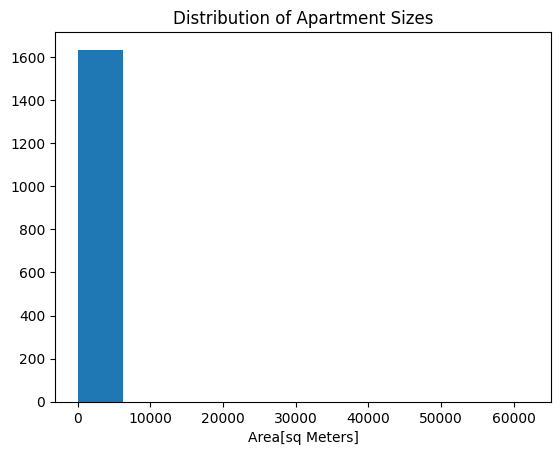

In [89]:
plt.hist(df1["surface_covered_in_m2"])
plt.xlabel("Area[sq Meters]")
plt.title("Distribution of Apartment Sizes");

##### Area Summary Statistics

In [91]:
df1["surface_covered_in_m2"].describe()

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm that there are potential outliers in the data. While most apartments in our dataset are smaller than 73 square meters, there are some that are several thousand square meters. Also, the minimum is 0, suggesting that there is an appartment with no area covered. Additionally, the standard deviation, or the spread aound the mean is too large suggesting there are outliers in  the data. 

##### Remove Outliers

##### Price vs Area Scatter Plot

##### Intro to Linear Models

#### Split